# Imports

In [1]:
import pathlib

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from scipy import signal
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose

# Constants

In [4]:
PROJECT_DIR = pathlib.Path('~/work').expanduser()
DATA_DIR = PROJECT_DIR / 'data'
DATA_PATH = DATA_DIR / 'India_Exchange_Rate_Dataset.xls'

# Data

In [5]:
data = pd.read_excel(io=DATA_PATH, 
                     index_col='observation_date',
                     parse_dates=True)

# Trend

## Detecting Trend 

### Hodrick-Prescott Filter

In [6]:
exinus_cycle, exinus_trend = hpfilter(x=data['EXINUS'], lamb=129600)

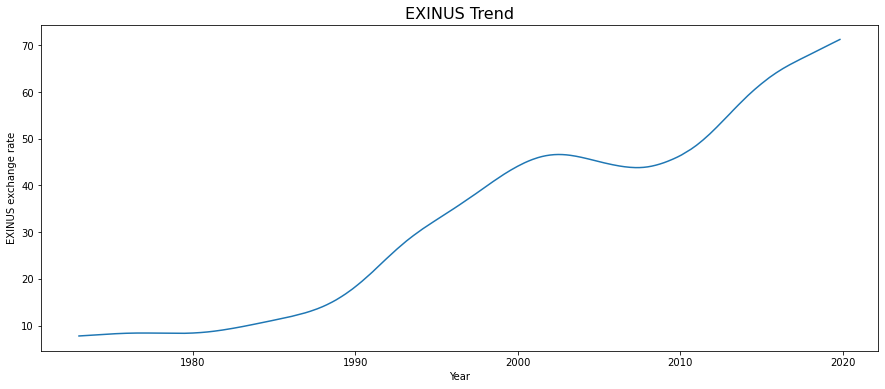

In [7]:
plt.figure(figsize=(15,6))
plt.plot(exinus_trend)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.title('EXINUS Trend', fontsize=16)
plt.show()

## Detrending a Time Series

### Pandas Differencing

In [8]:
diff = data['EXINUS'].diff()

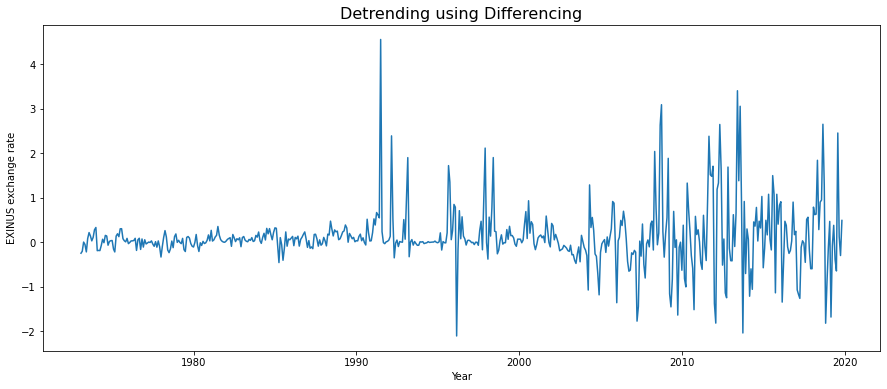

In [9]:
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.title('Detrending using Differencing', fontsize=16)
plt.show()

### SciPy Signal

In [10]:
detrended = signal.detrend(data['EXINUS'])

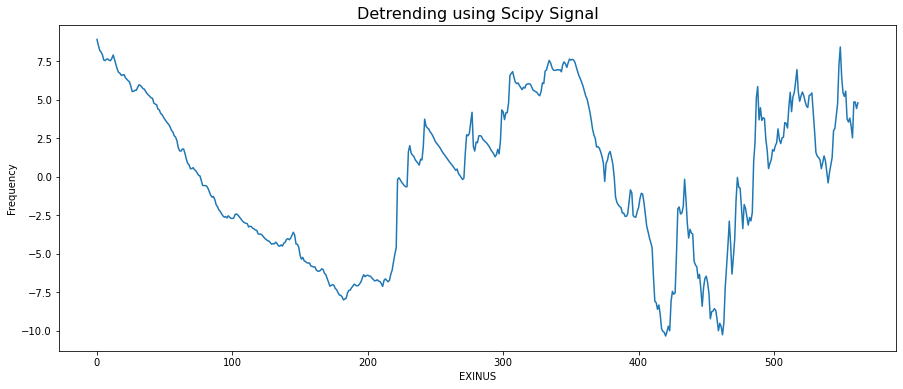

In [11]:
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.xlabel('EXINUS')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

### Hodrick-Prescott Filter

In [12]:
exinus_cycle, exinus_trend = hpfilter(x=data['EXINUS'], lamb=129600)
detrended = data['EXINUS'] - exinus_trend

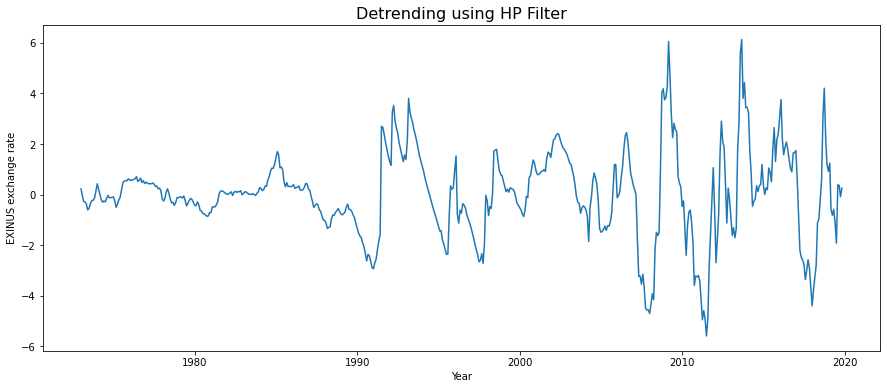

In [13]:
plt.figure(figsize=(15, 6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

# Seasonality

## Detecting Seasonality

### Multiple Box Plots

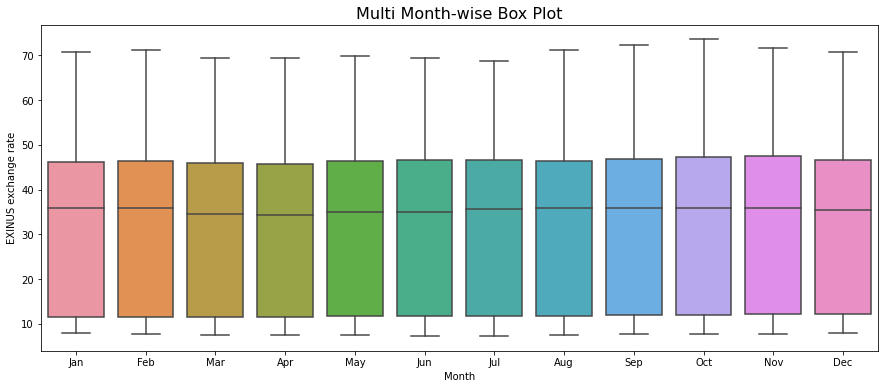

In [14]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=data.index.strftime('%b'), y=data['EXINUS'])
plt.xlabel('Month')
plt.ylabel('EXINUS exchange rate')
plt.title("Multi Month-wise Box Plot", fontsize=16)
plt.show()

### Autocorrelation Plot

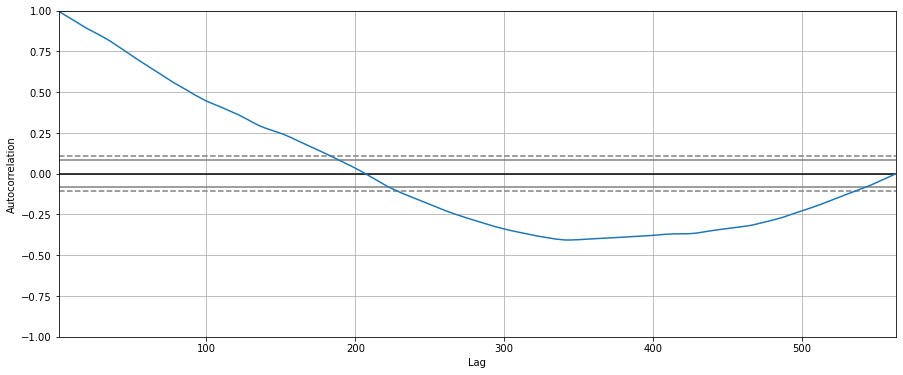

In [15]:
plt.figure(figsize=(15, 6))
pd.plotting.autocorrelation_plot(series=data['EXINUS'])
plt.show()

## Deseasoning of Time-Series Data

### Seasonal Decomposition

In [16]:
result_mul = seasonal_decompose(x=data['EXINUS'], 
                                model='multiplicative', 
                                extrapolate_trend='freq')
deseasoned = data['EXINUS'] - result_mul.seasonal

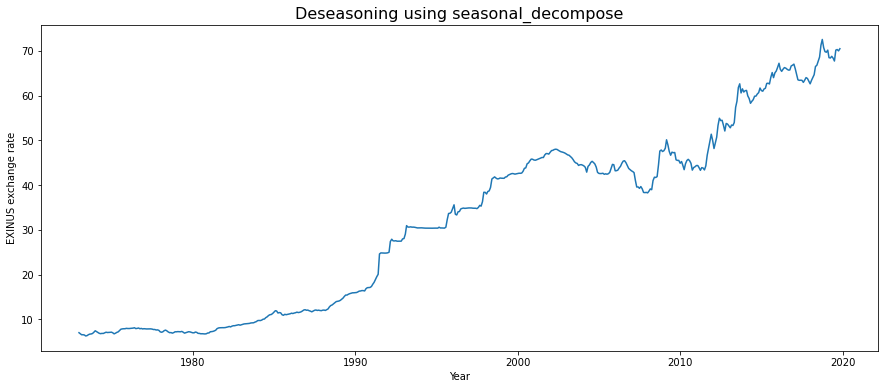

In [17]:
plt.figure(figsize=(15, 6))
plt.plot(deseasoned)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.show()

# Cyclic Variations

## Detecting Cyclic Variations

### Hodrick-Prescott Filter

In [18]:
exinus_cycle, exinus_trend = hpfilter(x=data['EXINUS'], lamb=129600)

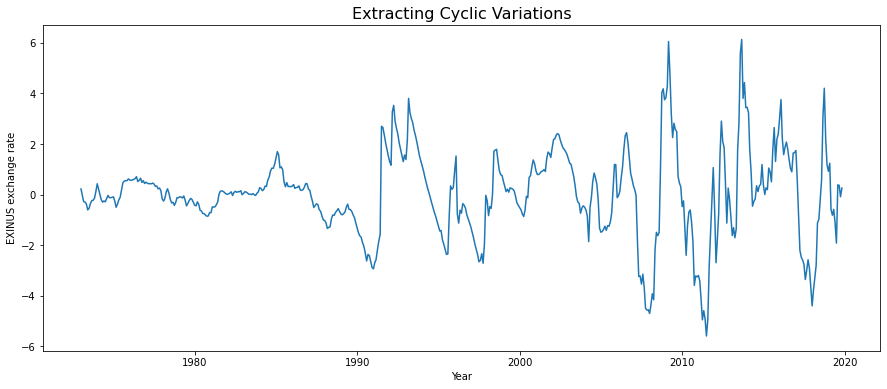

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(exinus_cycle)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.title('Extracting Cyclic Variations', fontsize=16)
plt.show()

# Decomposing a Time Series into Its Components

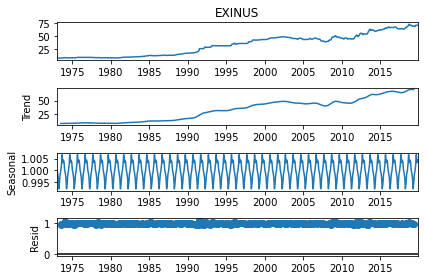

In [20]:
result = seasonal_decompose(data['EXINUS'], model='mul') 
result.plot()
plt.show()

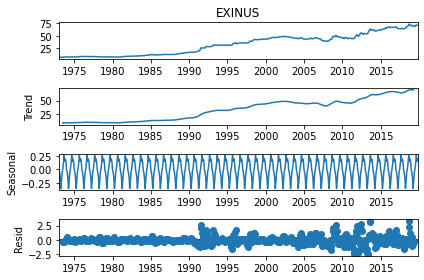

In [21]:
result = seasonal_decompose(data['EXINUS'], model='add') 
result.plot()
plt.show()